In [1]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_excel("dataset.xlsx").copy()

# Check which columns have null values
# print(df.isna().any()) # Should only be True for 'Account bio' and 'Location'

# Dealing with null values
df["Account bio"] = df["Account bio"].fillna("No bio")
df["Location"] = df["Location"].fillna("No location")

# Joined
for i in range(len(df)):
    if isinstance(df["Joined"][i], str):
        date = df["Joined"][i].split("/")
        df["Joined"][i] = f"{('0' * (2 - len(date[0]))) + date[0]}/{df['Joined'][i][-2:]}"
    else:
        date = str(df["Joined"][i]).split()[0].split("-")
        df["Joined"][i] = f"{date[1]}/{date[2]}"

# Interactions
df["Interactions"] = df["Likes"] + df["Replies"] + df["Retweets"]

# Date posted
for i in range(len(df)):
    if isinstance(df["Date posted"][i], str):
        date = df["Date posted"][i].split()[0].split("/")
        df["Date posted"][i] = int(date[1]) + (12 * (int(date[2][2:] if len(date[2]) > 2 else date[2]) - 16))
        # df["Date posted"][i] = f"{('0' * (2 - len(date[1]))) + date[1]}/{date[2][2:] if len(date[2]) > 2 else date[2]}"
    else:
        date = str(df["Date posted"][i]).split()[0].split("-")
        df["Date posted"][i] = int(date[2]) + (12 * (int(date[0][2:]) - 16))
        # df["Date posted"][i] = f"{date[2]}/{date[0][2:]}"

# mm_yy = [f"{i if i >= 10 else '0' + str(i)}/{j}" for j in range(16, 23) for i in range(1, 13)]
mm_yy = [i for i in range(1, 85)]
date_df = pd.DataFrame(mm_yy, columns=["Month"])
date_df["Count"] = date_df["Month"].map(df["Date posted"].value_counts())
date_df["Count"] = date_df["Count"].fillna(0)
date_df["Interactions"] = date_df["Month"].map(df.groupby("Date posted")["Interactions"].sum())
date_df["Interactions"] = date_df["Interactions"].fillna(0)

C:\Users\josh\AppData\Local\Temp\ipykernel_1236\3561310484.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Joined"][i] = f"{('0' * (2 - len(date[0]))) + date[0]}/{df['Joined'][i][-2:]}"
C:\Users\josh\AppData\Local\Temp\ipykernel_1236\3561310484.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Joined"][i] = f"{date[1]}/{date[2]}"
C:\Users\josh\AppData\Local\Temp\ipykernel_1236\3561310484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

# T-TEST

In [2]:
# ep2016    -> 2016 election period (March - June)
# ep2019    -> 2019 election period (March - June)
# ep2022    -> 2022 election period (March - June)
# total_ep  -> all 3 election periods combined
# non_ep    -> Non-election period months
ep2016 = np.asarray([date_df["Count"][i-1] for i in range(3, 8)])
ep2019 = np.asarray([date_df["Count"][i-1] for i in range(39, 44)])
ep2022 = np.asarray([date_df["Count"][i-1] for i in range(75, 80)])
total_ep = np.asarray([date_df["Count"][i-1] for j in [3, 39, 75] for i in range(j, j + 5)])
non_ep = np.asarray([date_df["Count"][i-1] for i in range(1, 85) if i not in [k for k in range(3, 8)] + [k for k in range(39, 44)] + [k for k in range(75, 80)]])

# Mean of each sample group
print(f"ep2016 mean: {ep2016.mean()}\nep2019 mean: {ep2019.mean()}\nep2022 mean: {ep2022.mean()}")
print(f"total_ep mean: {total_ep.mean()}\nnon_ep mean: {non_ep.mean()}")

# Mean of total population (all tweets)
pop_mean = date_df['Count'].mean()
print(f"Population mean: {pop_mean}")

# ------------------------------------------------ T-TEST ------------------------------------------------

# Null hypothesis: ep_2016/ep_2019/ep_2022/total_ep is NOT significantly different from total population

# Checks if 2016 election period is significantly different from the total population
t_statistic, p_value = stats.ttest_1samp(a=ep2016, popmean=pop_mean, alternative="greater")
print(f"t-test p-value of ep_2016 against population: {p_value}")

# Checks if 2019 election period is significantly different from the total population
t_statistic, p_value = stats.ttest_1samp(a=ep2019, popmean=pop_mean, alternative="greater")
print(f"t-test p-value of ep_2019 against population: {p_value}")

# Checks if 2022 election period is significantly different from the total population
t_statistic, p_value = stats.ttest_1samp(a=ep2022, popmean=pop_mean, alternative="greater")
print(f"t-test p-value of ep_2022 against population: {p_value}")

# Checks if combined election periods are significantly different from the total population
t_statistic, p_value = stats.ttest_1samp(a=total_ep, popmean=pop_mean, alternative="greater")
print(f"t-test p-value of total_ep against population: {p_value}")

# If p-value is less than 0.05, reject the hypothesis, else, accept the hypothesis

# --------------------------------------------------------------------------------------------------------

ep2016 mean: 11.0
ep2019 mean: 7.0
ep2022 mean: 13.0
total_ep mean: 31.0
non_ep mean: 71.0
Population mean: 102.0
t-test p-value of ep_2016 against population: 0.9999999732956756
t-test p-value of ep_2019 against population: 0.9999999938039715
t-test p-value of ep_2022 against population: 0.9999999154126127
t-test p-value of total_ep against population: 1.0


# ANOVA

In [3]:
# ------------------------------------------------------- ANOVA -------------------------------------------------------

# Null hypothesis: ep_2016, ep_2019, ep_2022, non_ep/date_df['Count'] is NOT significantly different from each other

# Checks if the four groups are significantly different from each other (not particularly helpful for our hypothesis)
    # I'm not sure which of the two to use so use this test with caution
t_statistic, p_value = stats.f_oneway(ep2016, ep2019, ep2022, non_ep)
# t_statistic, p_value = stats.f_oneway(ep2016, ep2019, ep2022, date_df['Count'])

print(f"ANOVA p-value of the three election periods and non-election period: {p_value}")

# If p-value is less than 0.05, reject the hypothesis, else, accept the hypothesis

# ---------------------------------------------------------------------------------------------------------------------

ANOVA p-value of the three election periods and non-election period: 0.02730445669098163


# Wilcoxon rank-sum test

In [4]:
non_ep2016 = np.asarray([date_df["Count"][i-1] for i in range(1, 85) if i not in [k for k in range(3, 8)]])
non_ep2019 = np.asarray([date_df["Count"][i-1] for i in range(1, 85) if i not in [k for k in range(39, 44)]])
non_ep2022 = np.asarray([date_df["Count"][i-1] for i in range(1, 85) if i not in [k for k in range(75, 80)]])

print(f"{non_ep2016.mean()} {non_ep2019.mean()} {non_ep2022.mean()}")

# ------------------------------------------------ RANK_SUM TEST ------------------------------------------------

# Null hypothesis: ep_2016/ep_2019/ep_2022/total_ep is NOT significantly different from the rest of the months

# Checks if 2016 election period is significantly different from the rest of the months
t_statistic, p_value = stats.ranksums(ep2016, non_ep2016)
print(f"Rank-sum test p-value of ep_2016 against non_ep2016: {p_value}")

# Checks if 2019 election period is significantly different from the rest of the months
t_statistic, p_value = stats.ranksums(ep2019, non_ep2019)
print(f"Rank-sum test p-value of ep_2019 against non_ep2019: {p_value}")

# Checks if 2022 election period is significantly different from the rest of the months
t_statistic, p_value = stats.ranksums(ep2022, non_ep2022)
print(f"Rank-sum test p-value of ep_2022 against non_ep2022: {p_value}")

# Checks if combined election periods are significantly different from the rest of the months
t_statistic, p_value = stats.ranksums(total_ep, non_ep)
print(f"Rank-sum test p-value of total_ep against non_ep: {p_value}")

# If p-value is less than 0.05, reject the hypothesis, else, accept the hypothesis

# ---------------------------------------------------------------------------------------------------------------

1.1518987341772151 1.2025316455696202 1.1265822784810127
Rank-sum test p-value of ep_2016 against non_ep2016: 0.31181004105397847
Rank-sum test p-value of ep_2019 against non_ep2019: 0.7622830291261068
Rank-sum test p-value of ep_2022 against non_ep2022: 0.2940668318270381
Rank-sum test p-value of total_ep against non_ep: 0.1443195091558928


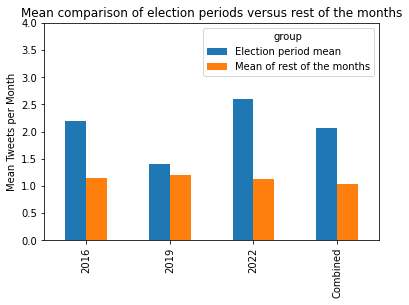

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.DataFrame([['Election period mean','2016',2.2],['Election period mean','2019',1.4],['Election period mean','2022',2.6],['Election period mean','Combined',2.07],
                    ['Mean of rest of the months','2016',1.15],['Mean of rest of the months','2019',1.2],['Mean of rest of the months','2022',1.13],['Mean of rest of the months','Combined',1.03]],
                    columns=['group','column','val'])

df2.pivot("column", "group", "val").plot(kind='bar')
plt.title("Mean comparison of election periods versus rest of the months")
plt.ylim((0, 4))
plt.ylabel("Mean Tweets per Month")
plt.xlabel("")
plt.show()

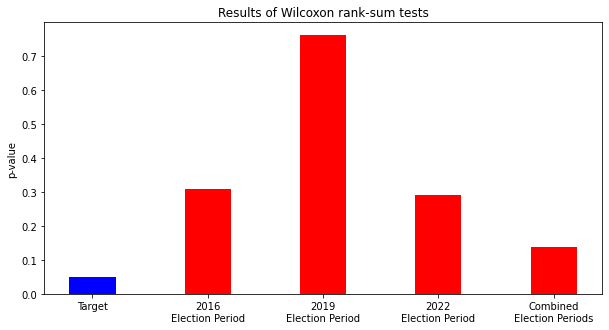

In [6]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Target':0.05, '2016\nElection Period':0.31, '2019\nElection Period':0.76,
        '2022\nElection Period':0.29, 'Combined\nElection Periods':0.14}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color =["blue", "red", "red", "red", "red"],
        width = 0.4)
 
plt.ylabel("p-value")
plt.title("Results of Wilcoxon rank-sum tests")
plt.show()